In [66]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras as ks
import os
import logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
logging.getLogger('absl').setLevel(logging.ERROR)

In [67]:
from sklearn.datasets import make_circles

n_samples = 1000

x, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)

In [68]:
circles = pd.DataFrame({"X0":x[:, 0], "X1":x[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


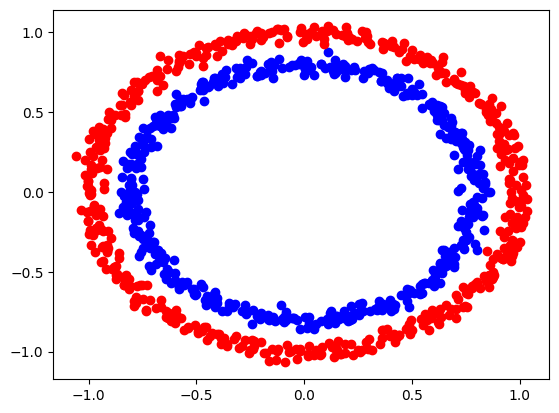

In [69]:
#show only dots with y=0 and y=1 in different colors
for i in range(len(x)):
    if y[i] == 0:
        plt.scatter(x[i][0], x[i][1], color='red')
    else:
        plt.scatter(x[i][0], x[i][1], color='blue')

In [70]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

In [71]:
x_train, y_train, x_test, y_test = x[:800], y[:800], x[800:], y[800:]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [72]:
x_train[:10], y_train[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [73]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(x, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 2.6575 - accuracy: 0.4580
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7091 - accuracy: 0.4870
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6953 - accuracy: 0.4910
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6959 - accuracy: 0.4900
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6955 - accuracy: 0.4530
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6954 - accuracy: 0.5170
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6958 - accuracy: 0.5010
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6971 - accuracy: 0.4740
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6949 - accuracy: 0.4460
Epoch 11/

In [74]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


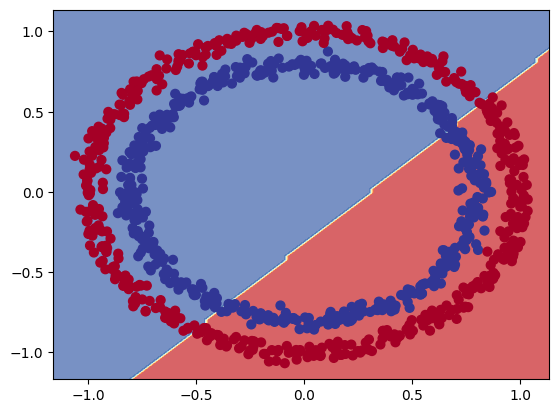

In [75]:
plot_decision_boundary(model_3, x, y)

Epoch 1/50
32/32 [==============================] - 1s 7ms/step - loss: 0.6971 - accuracy: 0.5130
Epoch 2/50
32/32 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.4990
Epoch 3/50
32/32 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.5120
Epoch 4/50
32/32 [==============================] - 0s 5ms/step - loss: 0.6937 - accuracy: 0.5100
Epoch 5/50
32/32 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.5210
Epoch 6/50
32/32 [==============================] - 0s 5ms/step - loss: 0.6927 - accuracy: 0.4950
Epoch 7/50
32/32 [==============================] - 0s 5ms/step - loss: 0.6921 - accuracy: 0.5050
Epoch 8/50
32/32 [==============================] - 0s 5ms/step - loss: 0.6924 - accuracy: 0.5180
Epoch 9/50
32/32 [==============================] - 0s 6ms/step - loss: 0.6916 - accuracy: 0.5620
Epoch 10/50
32/32 [==============================] - 0s 6ms/step - loss: 0.6915 - accuracy: 0.5890
Epoch 11/50
32/32 [

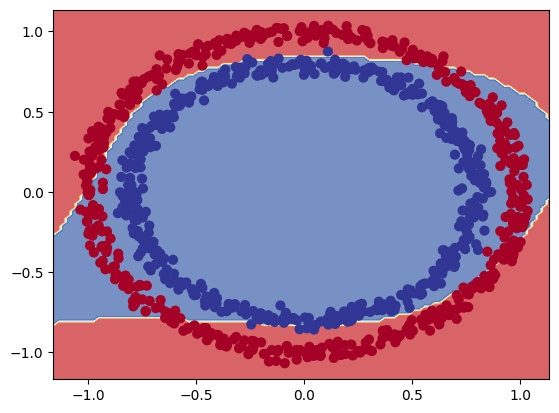

In [82]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_2 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Input(shape=(2,)), # add 100 dense neurons
  tf.keras.layers.Dense(15, activation=ks.activations.tanh), # add another layer with 10 neurons
  tf.keras.layers.Dense(15, activation=ks.activations.tanh), # add another layer with 10 neurons
  tf.keras.layers.Dense(1, activation=ks.activations.sigmoid)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
history = model_2.fit(x, y, epochs=50, verbose=1)

plot_decision_boundary(model_2, x, y)

<Axes: xlabel='epoch', ylabel='loss'>

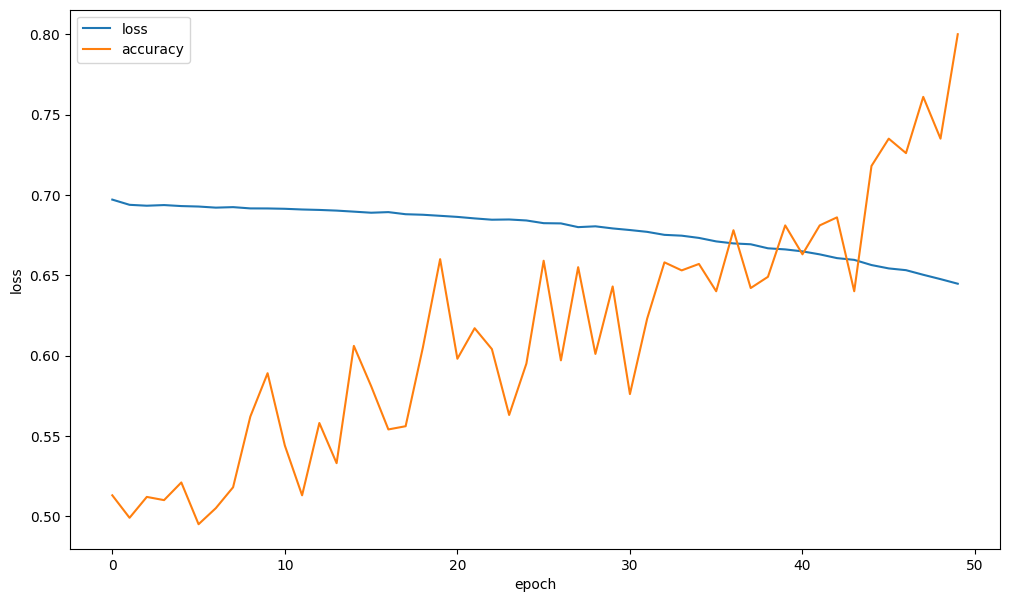

In [83]:
pd.DataFrame(history.history).plot(figsize=(12, 7), xlabel='epoch', ylabel='loss')

In [84]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

In [123]:
tf.random.set_seed(42)

model2 = ks.models.Sequential(layers=[
    ks.layers.Dense(4, input_shape=(2,), activation=ks.activations.relu),
    ks.layers.Dense(4, activation=ks.activations.relu),
    ks.layers.Dense(4, activation=ks.activations.relu),
    ks.layers.Dense(1, activation=ks.activations.sigmoid)
])

model2.compile(optimizer=ks.optimizers.Adam(learning_rate=0.02),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 5ms/step - loss: 0.7299 - accuracy: 0.4925
Epoch 2/25
25/25 [==============================] - 0s 4ms/step - loss: 0.7050 - accuracy: 0.5225
Epoch 3/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6983 - accuracy: 0.5013
Epoch 4/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6990 - accuracy: 0.5000
Epoch 5/25
25/25 [==============================] - 0s 4ms/step - loss: 0.7005 - accuracy: 0.4913
Epoch 6/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6960 - accuracy: 0.4950
Epoch 7/25
25/25 [==============================] - 0s 4ms/step - loss: 0.7085 - accuracy: 0.5000
Epoch 8/25
25/25 [==============================] - 0s 4ms/step - loss: 0.7384 - accuracy: 0.5175
Epoch 9/25
25/25 [==============================] - 0s 4ms/step - loss: 0.7211 - accuracy: 0.5412
Epoch 10/25
25/25 [==============================] - 0s 4ms/step - loss: 0.7638 - accuracy: 0.5013
Epoch 11/25
25/25 [

<Axes: xlabel='epoch', ylabel='loss'>

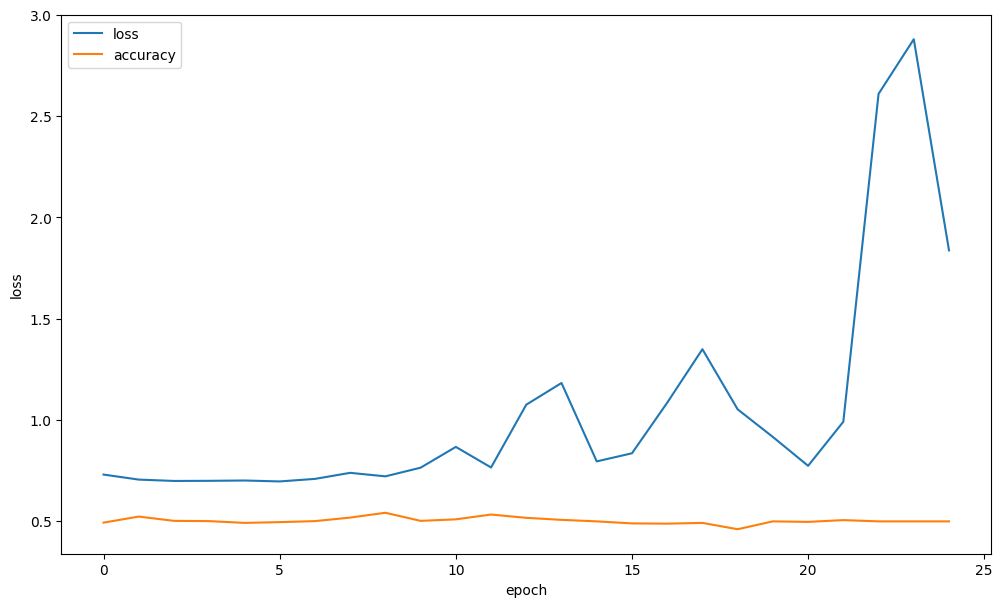

In [124]:
pd.DataFrame(history2.history).plot(figsize=(12, 7), xlabel='epoch', ylabel='loss')

313/313 [==============================] - 0s 2ms/step
doing binary classifcation...


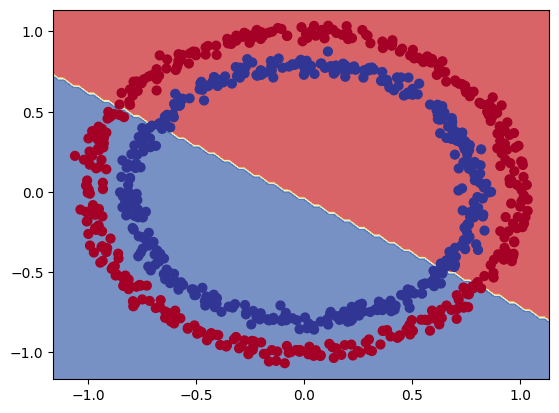

In [120]:
model2.evaluate(x_test, y_test)
plot_decision_boundary(model2, x_train, y_train)

In [153]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(14, input_shape=(None, 2)),
  tf.keras.layers.Dense(14, activation=ks.activations.tanh),
  tf.keras.layers.Dense(14, activation=ks.activations.tanh),
  tf.keras.layers.Dense(1, activation=ks.activations.sigmoid)
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=[ks.metrics.binary_accuracy])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(x_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6995 - binary_accuracy: 0.5375
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6961 - binary_accuracy: 0.4712
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6930 - binary_accuracy: 0.5088
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6917 - binary_accuracy: 0.5450
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6882 - binary_accuracy: 0.5150
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6818 - binary_accuracy: 0.5625
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6726 - binary_accuracy: 0.5875
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6649 - binary_accuracy: 0.6375
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6373 - binary_accuracy: 0.6875
Epoch 10/100
25/25 [==========================

<Axes: xlabel='epoch', ylabel='loss'>

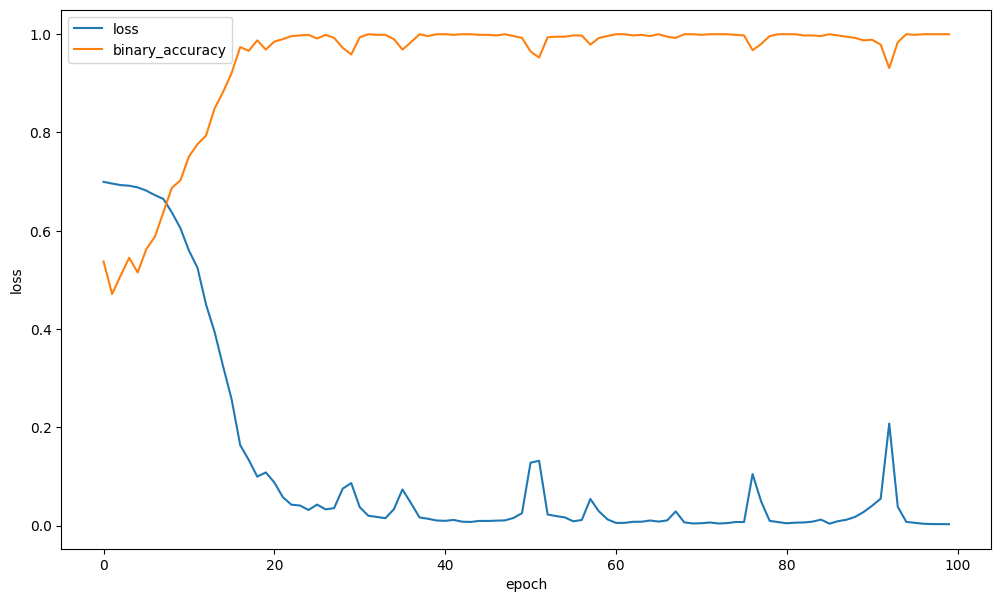

In [154]:
pd.DataFrame(history.history).plot(figsize=(12, 7), xlabel='epoch', ylabel='loss')

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


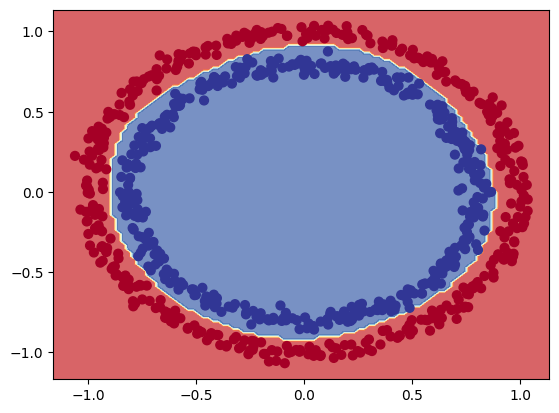

In [155]:

model_10.evaluate(x_test, y_test)
plot_decision_boundary(model_10, x_train, y_train)